# Decision Trees

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree       # Import Decision Tree Classifier and plot_tree 
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

## Loading Data

The dataset used is the Pima Indians Diabetes Dataset, available publicly via Kaggle and the UCI Machine Learning Repository.

This dataset contains medical data from female patients of Pima Indian heritage, used to predict the onset of diabetes based on diagnostic measures.



https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [4]:
# Define the labels for the diabeties datafile
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# load dataset
pima = pd.read_csv("diabetes.csv", header = 0, names = col_names)
# change the path of C drive where you have downsloaded your "pima-indians-diabetes.csv"

In [5]:
# Display the first 5 records
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Check missing/ null values in variables
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

## Feature Selection

In [8]:
# split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols]               # Features of the dataset
y = pima.label                       # Target variable of the dataset

# Display the X and y arrays
print(X, y)

     pregnant  insulin   bmi  age  glucose  bp  pedigree
0           6        0  33.6   50      148  72     0.627
1           1        0  26.6   31       85  66     0.351
2           8        0  23.3   32      183  64     0.672
3           1       94  28.1   21       89  66     0.167
4           0      168  43.1   33      137  40     2.288
..        ...      ...   ...  ...      ...  ..       ...
763        10      180  32.9   63      101  76     0.171
764         2        0  36.8   27      122  70     0.340
765         5      112  26.2   30      121  72     0.245
766         1        0  30.1   47      126  60     0.349
767         1        0  30.4   23       93  70     0.315

[768 rows x 7 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64


## Splitting Data

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

## Building Decision Tree Model

In [12]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Evaluating Model

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.7575757575757576
Accuracy: 0.76


In [15]:
X.columns.tolist()

['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

In [16]:
pima['label'].unique().tolist()

[1, 0]

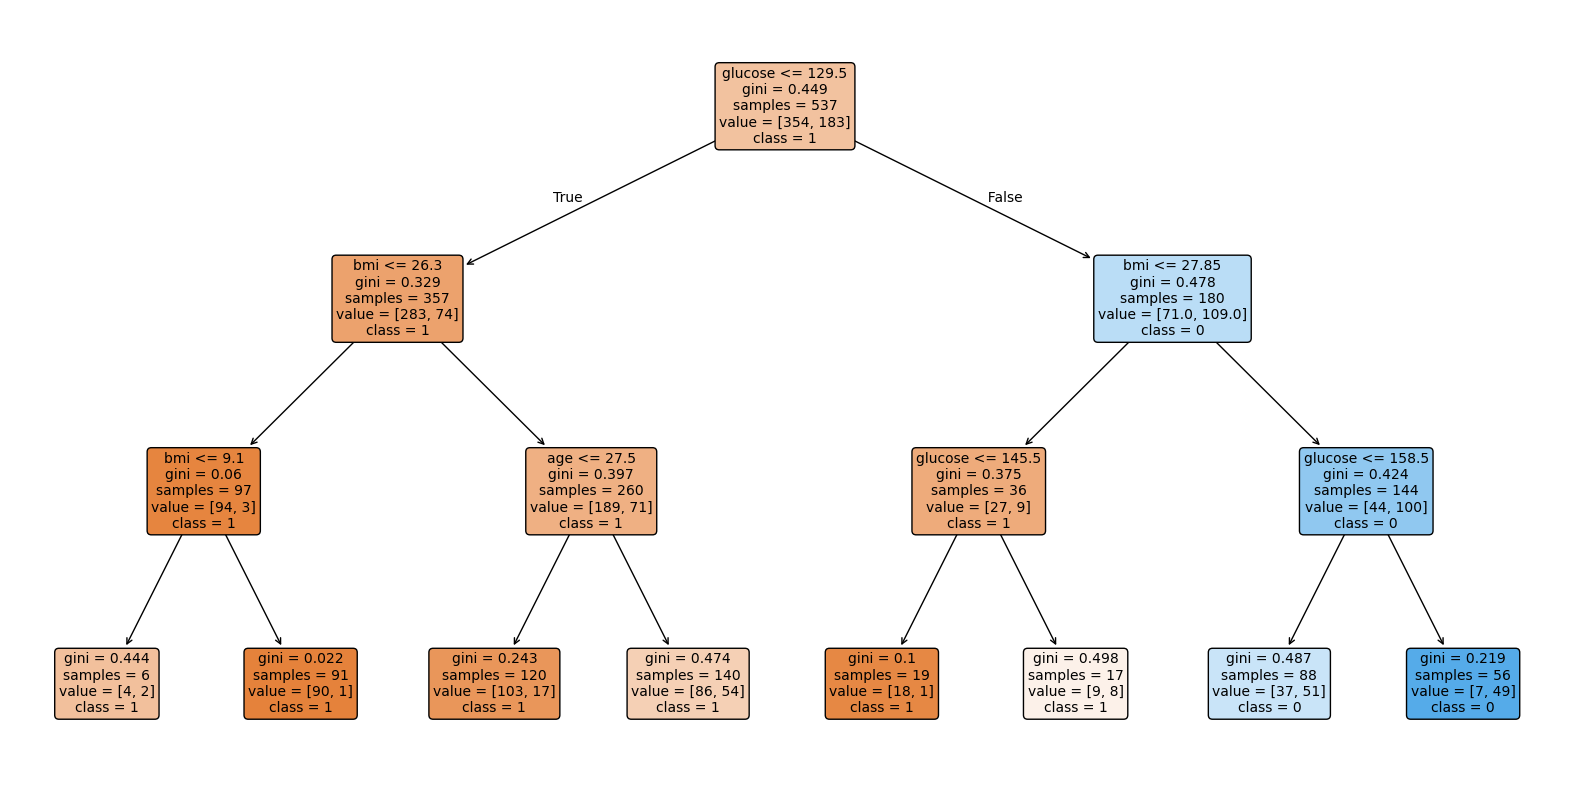

In [17]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=[str(label) for label in pima['label'].unique()], rounded=True, fontsize=10)
plt.show()


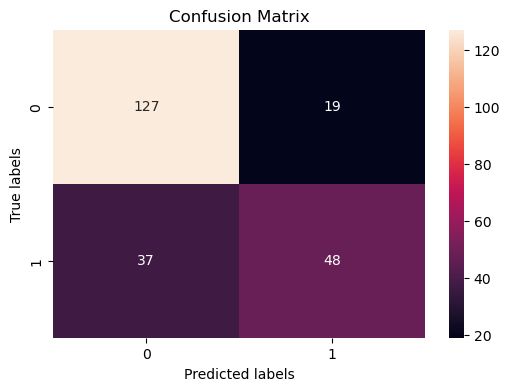

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict by using an object classifier 'clf'
y_predict = clf.predict(X_test)

# Calculate cm by using a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_predict)

# Plot confusion matrix with integers using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')  # 'd' stands for integer format
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)
